In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score

Accuracy: 0.9823
Mean Cross-Validation Accuracy: 0.9784
Training Accuracy: 0.9862
Testing Accuracy: 0.9823

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     84805
           1       0.87      0.92      0.89      7448

    accuracy                           0.98     92253
   macro avg       0.93      0.95      0.94     92253
weighted avg       0.98      0.98      0.98     92253


Confusion Matrix:
[[83753  1052]
 [  580  6868]]


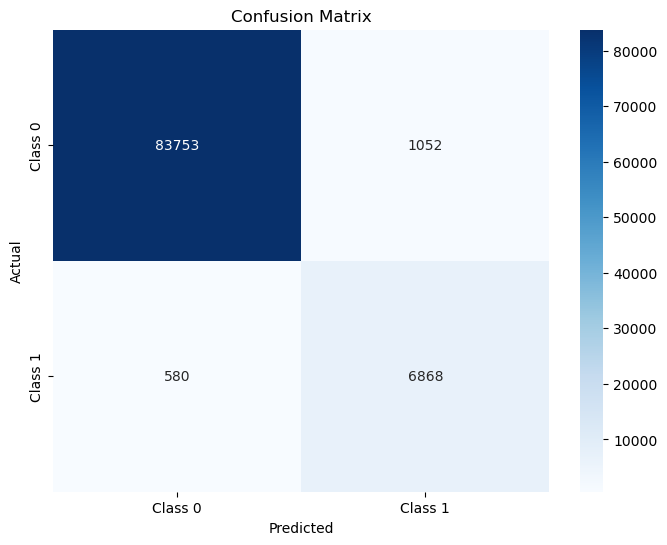

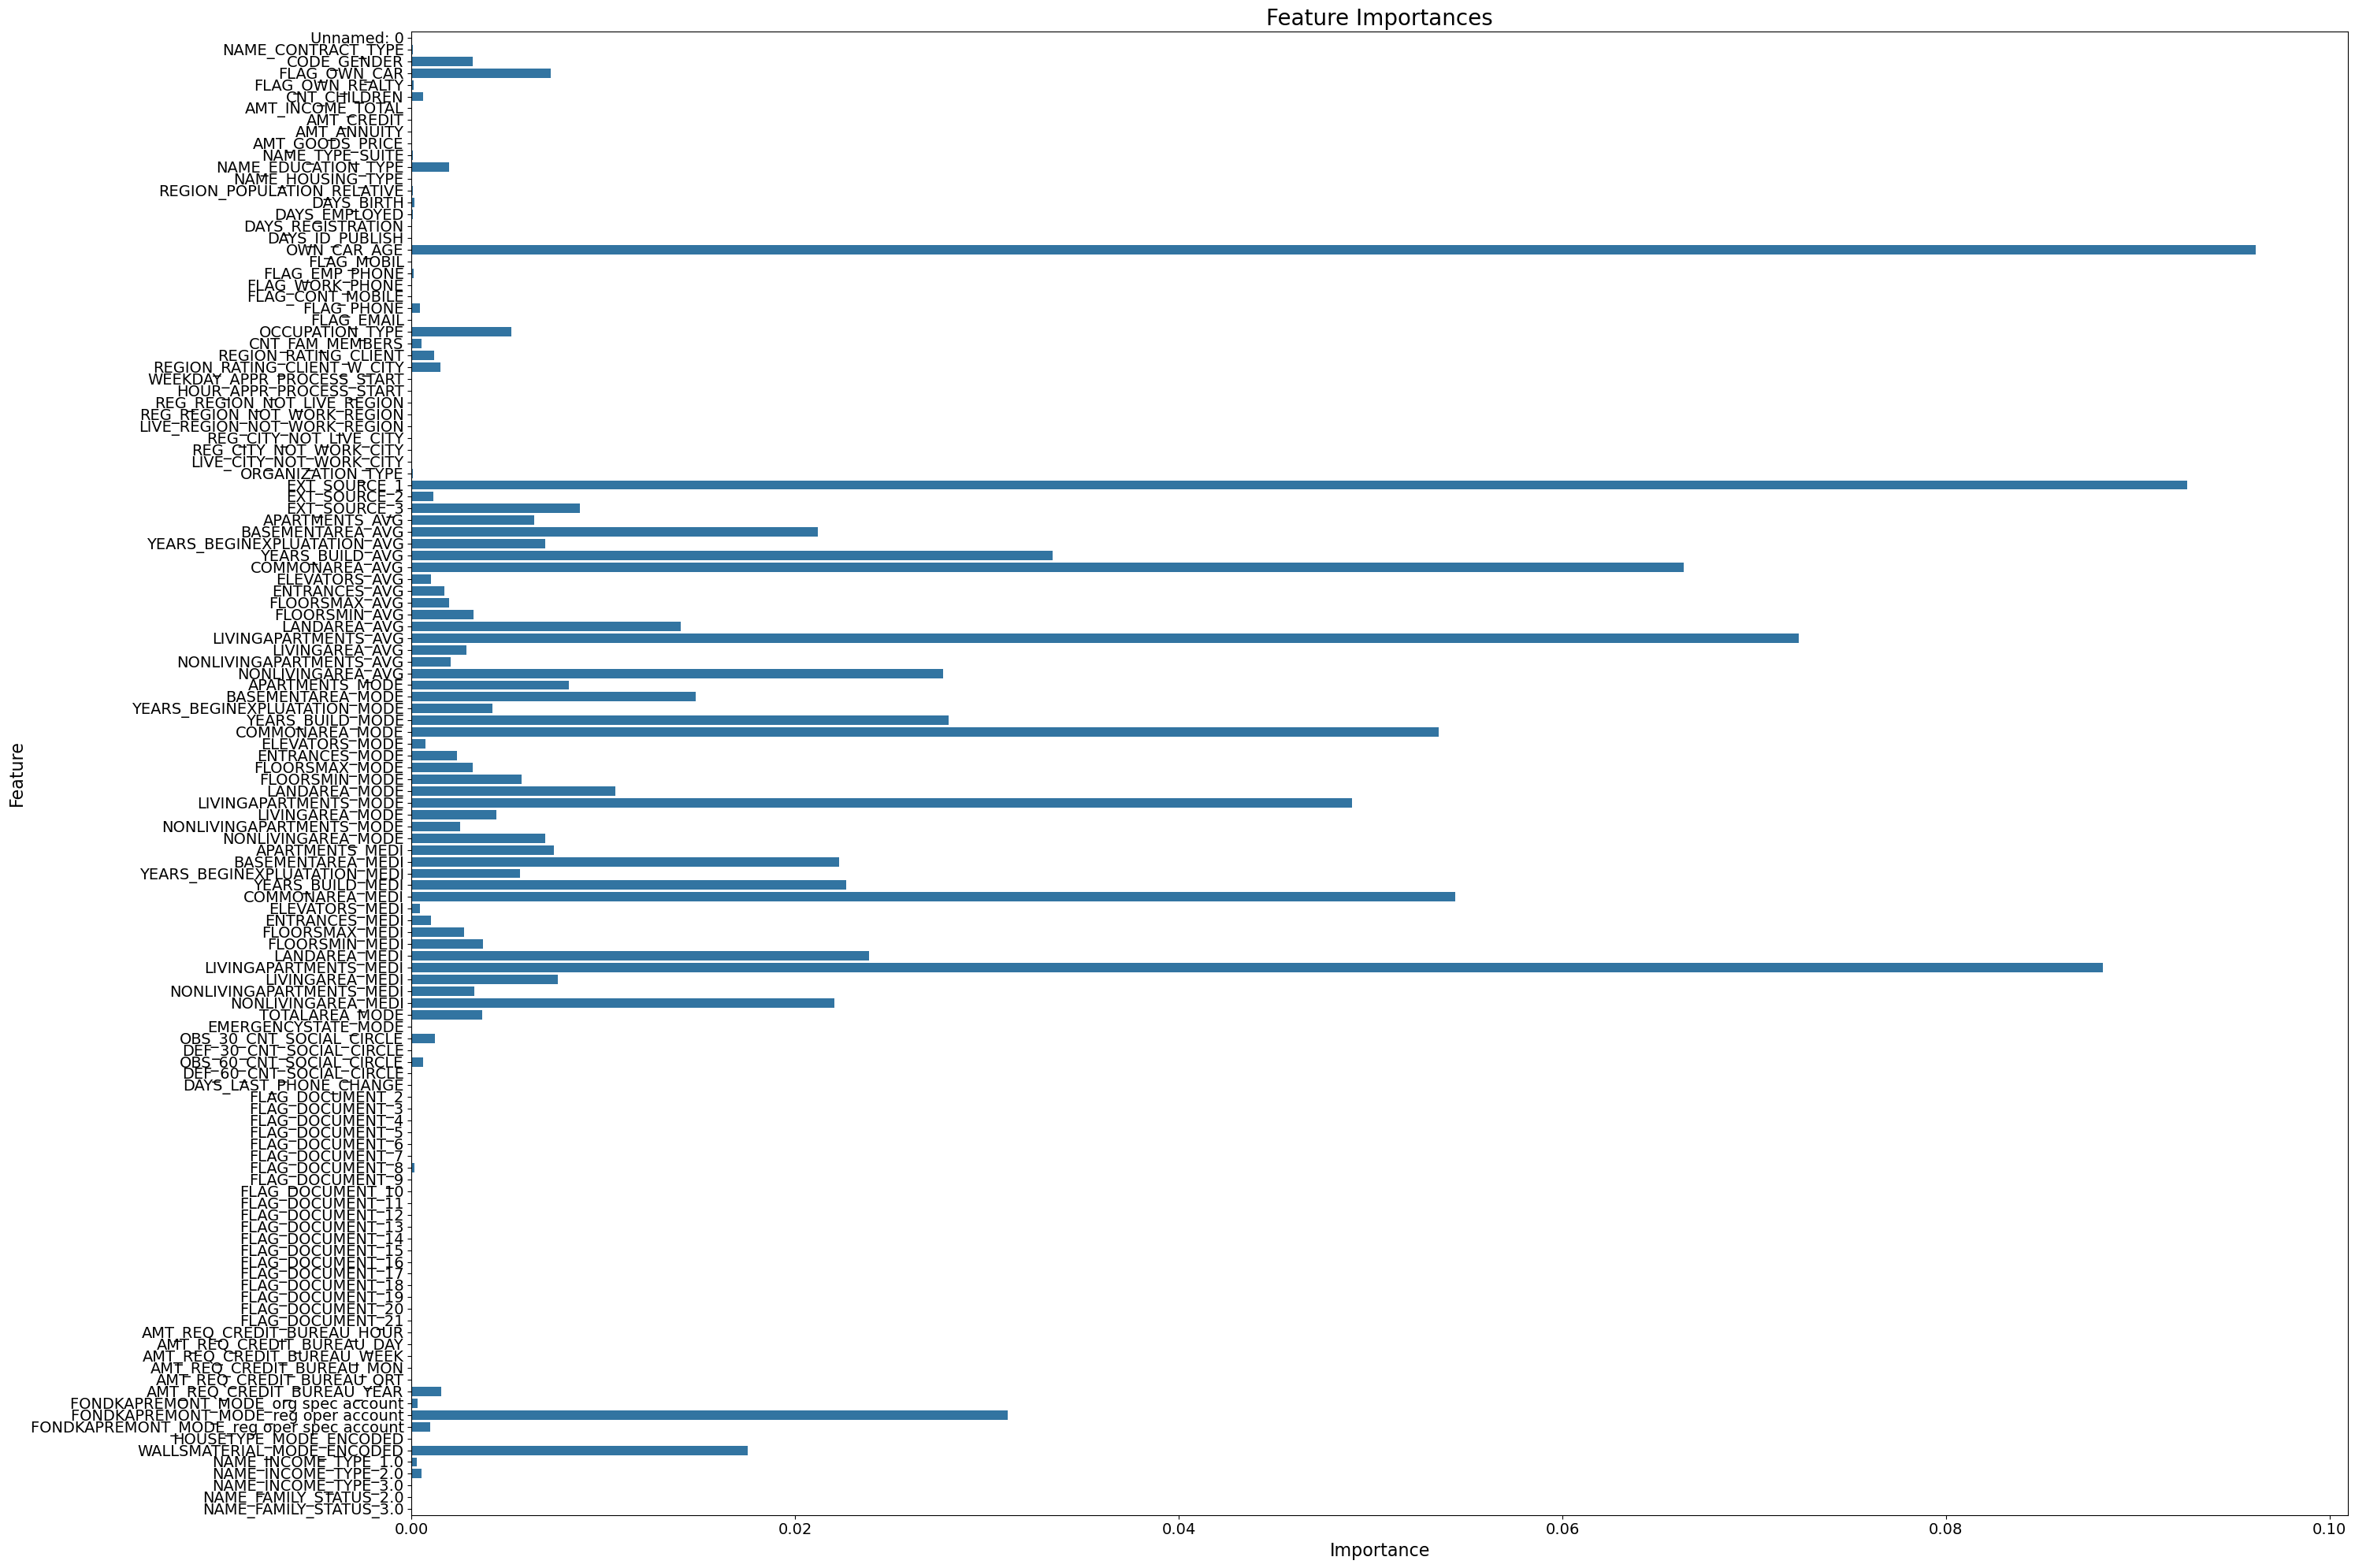

Important features: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE_reg oper account']


In [56]:
# 데이터 불러오기
df = pd.read_csv("/Users/hyunwoo/Desktop/restart/DataMining_TeamProject/scaled_by_skweness_and_kurtosis.csv")

# X (특성)와 Y (타겟) 나누기
X = df.drop(columns=['TARGET'])  # 타겟 변수 제외
Y = df['TARGET']                 # 타겟 변수

# 데이터 분할: 훈련 데이터와 테스트 데이터
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# SMOTE를 사용하여 오버샘플링
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# 랜덤 포레스트 모델 생성 (과적합 방지 적용)
rf_model = RandomForestClassifier(
    random_state=42, 
    n_estimators=200,        # 앙상블 크기
    max_depth=5,             # 트리 최대 깊이 제한
    min_samples_split=5,     # 노드 분할 최소 샘플 수
    min_samples_leaf=2,      # 리프 노드 최소 샘플 수
    max_features='sqrt'      # 분할 시 고려할 특성 수
)

# 모델 훈련 (오버샘플링된 훈련 데이터 사용)
rf_model.fit(X_train_resampled, Y_train_resampled)

# 테스트 데이터 성능 확인
Y_pred = rf_model.predict(X_test)  # NotFittedError를 방지하려면 fit 이후 호출해야 함
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 교차 검증
scores = cross_val_score(rf_model, X, Y, cv=5, scoring='accuracy')
print(f"Mean Cross-Validation Accuracy: {scores.mean():.4f}")

# 훈련/테스트 성능 비교
train_accuracy = rf_model.score(X_train_resampled, Y_train_resampled)
test_accuracy = rf_model.score(X_test, Y_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# 세부 성능 지표
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# 혼동 행렬 출력
cm = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:")
print(cm)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 특성 중요도 시각화
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(30, 20))  # 그래프 크기를 더 크게 설정
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importances", fontsize=20)
plt.xlabel("Importance", fontsize=16)
plt.ylabel("Feature", fontsize=16)

# 특성 이름이 길다면 회전시켜서 가독성 향상
plt.yticks(rotation=0, fontsize=14)  # 특성 이름이 수평으로 보이게 설정
plt.xticks(fontsize=14)

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 중요도가 높은 특성만 선택 (예: 중요도가 0.05 이상인 특성)
important_features = [features[i] for i in range(len(feature_importances)) if feature_importances[i] > 0.02]
print(f"Important features: {important_features}")


Accuracy: 0.9823
Mean Cross-Validation Accuracy: 0.9784
Training Accuracy: 0.9862
Testing Accuracy: 0.9823

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     84805
           1       0.87      0.92      0.89      7448

    accuracy                           0.98     92253
   macro avg       0.93      0.95      0.94     92253
weighted avg       0.98      0.98      0.98     92253


Confusion Matrix:
[[83753  1052]
 [  580  6868]]


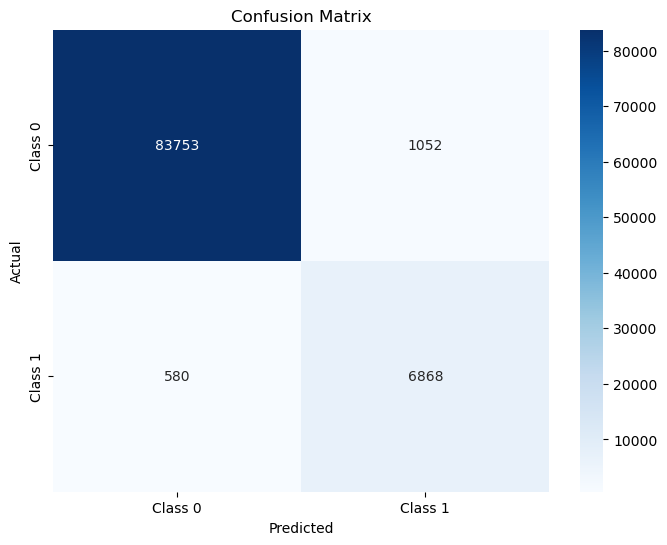

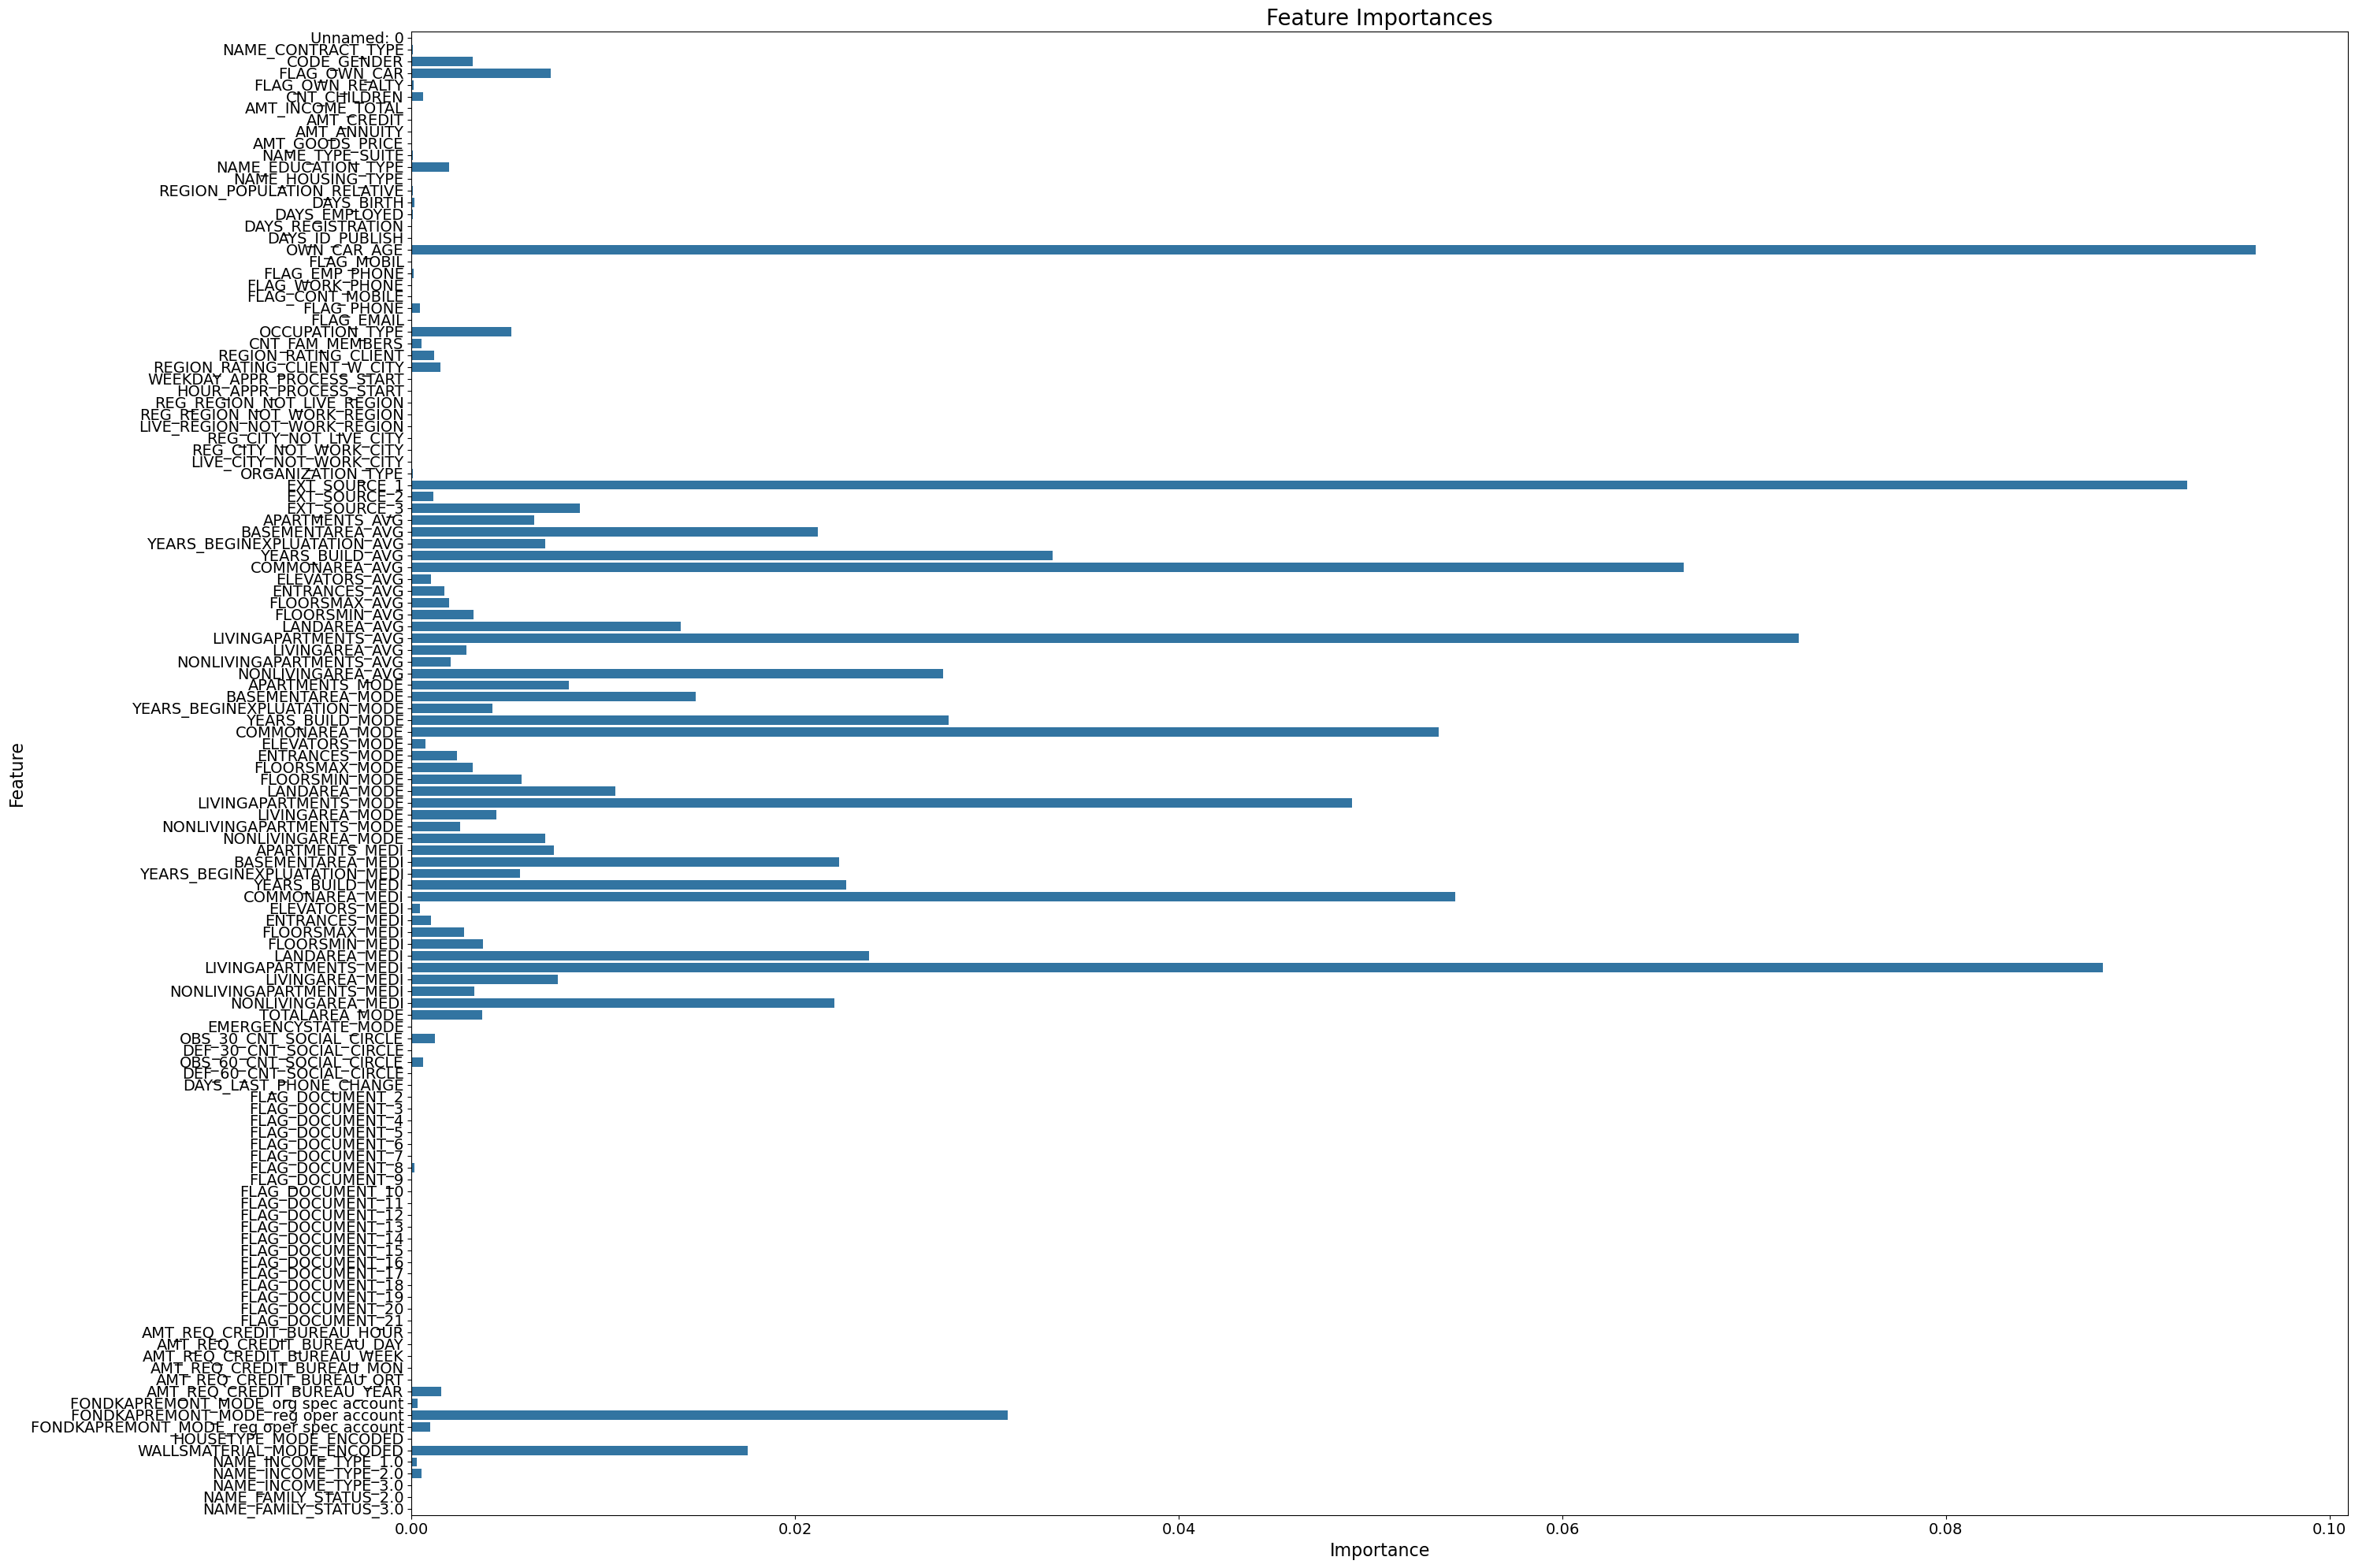

Important features: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'COMMONAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI', 'LIVINGAPARTMENTS_MEDI']


In [58]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score

# 데이터 불러오기
df = pd.read_csv("/Users/hyunwoo/Desktop/restart/DataMining_TeamProject/scaled_by_skweness_and_kurtosis.csv")

# X (특성)와 Y (타겟) 나누기
X = df.drop(columns=['TARGET'])  # 타겟 변수 제외
Y = df['TARGET']                 # 타겟 변수

# 데이터 분할: 훈련 데이터와 테스트 데이터
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# SMOTE를 사용하여 오버샘플링
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# 랜덤 포레스트 모델 생성 (과적합 방지 적용)
rf_model = RandomForestClassifier(
    random_state=42, 
    n_estimators=200,        # 앙상블 크기
    max_depth=5,             # 트리 최대 깊이 제한
    min_samples_split=5,     # 노드 분할 최소 샘플 수
    min_samples_leaf=2,      # 리프 노드 최소 샘플 수
    max_features='sqrt'      # 분할 시 고려할 특성 수
)

# 모델 훈련 (오버샘플링된 훈련 데이터 사용)
rf_model.fit(X_train_resampled, Y_train_resampled)

# 테스트 데이터 성능 확인
Y_pred = rf_model.predict(X_test)  # NotFittedError를 방지하려면 fit 이후 호출해야 함
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 교차 검증
scores = cross_val_score(rf_model, X, Y, cv=5, scoring='accuracy')
print(f"Mean Cross-Validation Accuracy: {scores.mean():.4f}")

# 훈련/테스트 성능 비교
train_accuracy = rf_model.score(X_train_resampled, Y_train_resampled)
test_accuracy = rf_model.score(X_test, Y_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# 세부 성능 지표
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# 혼동 행렬 계산
cm = confusion_matrix(Y_test, Y_pred)

# 혼동 행렬 출력
print("\nConfusion Matrix:")
print(cm)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 특성 중요도 시각화
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(30, 20))  # 그래프 크기를 더 크게 설정
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importances", fontsize=20)
plt.xlabel("Importance", fontsize=16)
plt.ylabel("Feature", fontsize=16)

# 특성 이름이 길다면 회전시켜서 가독성 향상
plt.yticks(rotation=0, fontsize=14)  # 특성 이름이 수평으로 보이게 설정
plt.xticks(fontsize=14)

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 중요도가 높은 특성만 선택 (예: 중요도가 0.05 이상인 특성)
important_features = [features[i] for i in range(len(feature_importances)) if feature_importances[i] > 0.05]
print(f"Important features: {important_features}")


Important features: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'COMMONAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI', 'LIVINGAPARTMENTS_MEDI']

Random Forest Confusion Matrix (Important Features):
[[82791  2014]
 [  233  7215]]


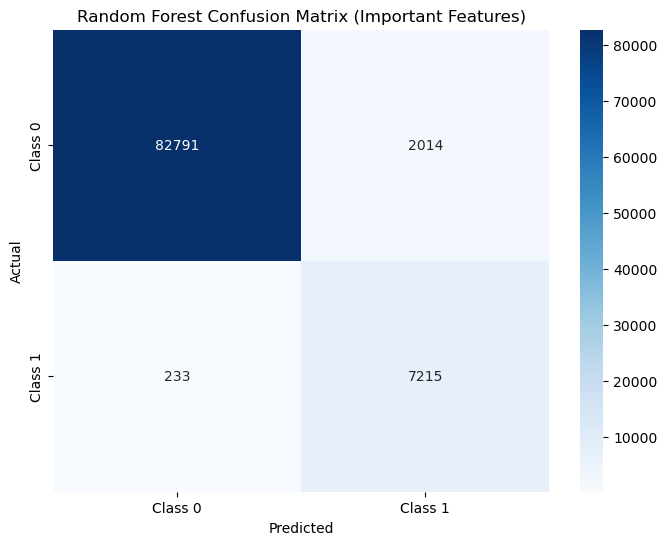

Random Forest Precision (Class 0): 0.9972
Random Forest Precision (Class 1): 0.7818
Random Forest Recall (Class 0): 0.9763
Random Forest Recall (Class 1): 0.9687
Random Forest F1-Score (Class 0): 0.9866
Random Forest F1-Score (Class 1): 0.8653
Random Forest ROC AUC: 0.9966

Logistic Regression Confusion Matrix (Important Features):
[[70295 14510]
 [ 1290  6158]]


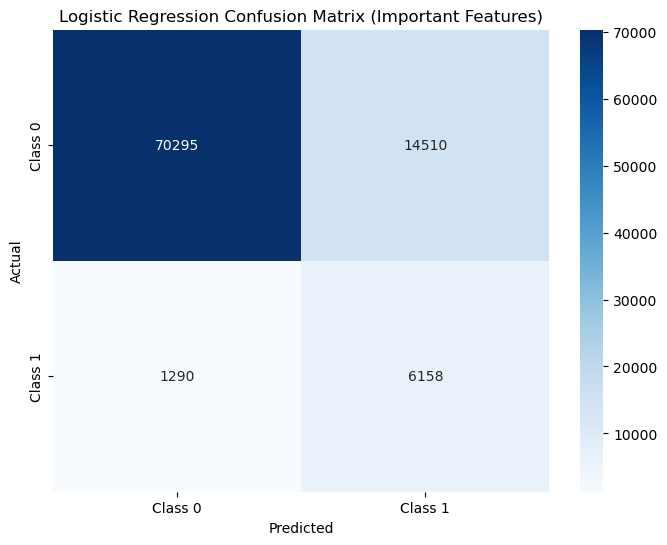

Logistic Regression Precision (Class 0): 0.9820
Logistic Regression Precision (Class 1): 0.2979
Logistic Regression Recall (Class 0): 0.8289
Logistic Regression Recall (Class 1): 0.8268
Logistic Regression F1-Score (Class 0): 0.8990
Logistic Regression F1-Score (Class 1): 0.4380
Logistic Regression ROC AUC: 0.8051


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# 중요도가 높은 특성만 선택 (0.05 이상인 특성)
important_features = [features[i] for i in range(len(feature_importances)) if feature_importances[i] > 0.05]
print(f"Important features: {important_features}")

# 중요도 기준으로 선택한 특성만 사용하여 데이터 준비
X_train_important = X_train_resampled[important_features]
X_test_important = X_test[important_features]

# 1. 랜덤 포레스트 모델
rf_model_important = RandomForestClassifier(
    random_state=42, 
    n_estimators=200,        
    max_depth=5,             
    min_samples_split=5,     
    min_samples_leaf=2,      
    max_features='sqrt'
)

# 모델 훈련 (오버샘플링된 훈련 데이터 사용)
rf_model_important.fit(X_train_important, Y_train_resampled)

# 예측 및 혼동 행렬 출력
Y_pred_rf = rf_model_important.predict(X_test_important)
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
print("\nRandom Forest Confusion Matrix (Important Features):")
print(cm_rf)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Random Forest Confusion Matrix (Important Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precision, Recall, F1-Score, ROC AUC 계산
precision_rf_0 = precision_score(Y_test, Y_pred_rf, pos_label=0)
precision_rf_1 = precision_score(Y_test, Y_pred_rf, pos_label=1)
recall_rf_0 = recall_score(Y_test, Y_pred_rf, pos_label=0)
recall_rf_1 = recall_score(Y_test, Y_pred_rf, pos_label=1)
f1_rf_0 = f1_score(Y_test, Y_pred_rf, pos_label=0)
f1_rf_1 = f1_score(Y_test, Y_pred_rf, pos_label=1)
roc_auc_rf = roc_auc_score(Y_test, rf_model_important.predict_proba(X_test_important)[:, 1])

print(f"Random Forest Precision (Class 0): {precision_rf_0:.4f}")
print(f"Random Forest Precision (Class 1): {precision_rf_1:.4f}")
print(f"Random Forest Recall (Class 0): {recall_rf_0:.4f}")
print(f"Random Forest Recall (Class 1): {recall_rf_1:.4f}")
print(f"Random Forest F1-Score (Class 0): {f1_rf_0:.4f}")
print(f"Random Forest F1-Score (Class 1): {f1_rf_1:.4f}")
print(f"Random Forest ROC AUC: {roc_auc_rf:.4f}")

# 2. 로지스틱 회귀 모델
log_reg_model = LogisticRegression(random_state=42)

# 모델 훈련 (오버샘플링된 훈련 데이터 사용)
log_reg_model.fit(X_train_important, Y_train_resampled)

# 예측 및 혼동 행렬 출력
Y_pred_log_reg = log_reg_model.predict(X_test_important)
cm_log_reg = confusion_matrix(Y_test, Y_pred_log_reg)
print("\nLogistic Regression Confusion Matrix (Important Features):")
print(cm_log_reg)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Logistic Regression Confusion Matrix (Important Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precision, Recall, F1-Score, ROC AUC 계산
precision_log_reg_0 = precision_score(Y_test, Y_pred_log_reg, pos_label=0)
precision_log_reg_1 = precision_score(Y_test, Y_pred_log_reg, pos_label=1)
recall_log_reg_0 = recall_score(Y_test, Y_pred_log_reg, pos_label=0)
recall_log_reg_1 = recall_score(Y_test, Y_pred_log_reg, pos_label=1)
f1_log_reg_0 = f1_score(Y_test, Y_pred_log_reg, pos_label=0)
f1_log_reg_1 = f1_score(Y_test, Y_pred_log_reg, pos_label=1)
roc_auc_log_reg = roc_auc_score(Y_test, log_reg_model.predict_proba(X_test_important)[:, 1])

print(f"Logistic Regression Precision (Class 0): {precision_log_reg_0:.4f}")
print(f"Logistic Regression Precision (Class 1): {precision_log_reg_1:.4f}")
print(f"Logistic Regression Recall (Class 0): {recall_log_reg_0:.4f}")
print(f"Logistic Regression Recall (Class 1): {recall_log_reg_1:.4f}")
print(f"Logistic Regression F1-Score (Class 0): {f1_log_reg_0:.4f}")
print(f"Logistic Regression F1-Score (Class 1): {f1_log_reg_1:.4f}")
print(f"Logistic Regression ROC AUC: {roc_auc_log_reg:.4f}")
